<center>Проект по вычислительной математике</center>
<center>Решение уравнения Буссинеска</center>



Рассмотрим следующую задачу. Пусть имеется озеро и деревня, с расположенными под ними гидроупорным слоем. Пусть u(x,t) - уровень воды над слоем при x > 0. Пусть весной, к моменту t > 0 вода в озере поднялась до нулевой отметки и продолжает прибывать по закону
$u(0,t) = Kt$. Ставится вопрос о том, как быстро затопление дойдет до деревни, расположенной на высоте H над гидроупором
и имеющей координату x = L  - задача о наводнении.

Математическая модель процесса выражается следующим уравнением с начальным и граничным условием: 
\begin{cases}
c(u)\frac{\partial u}{\partial t} = \frac{\partial}{\partial x}\left[k(u)u'_x \right]; 0 \leq x , 0 \leq t \leq T \\
k(u) = u; c(u) = 1 \\
u(0, t) = Kt= \varphi_1(t); t > 0 \\
u(x, 0) = 0 = \psi(x);x \geq 0 
\end{cases}

Решение данной системы:
\begin{cases}
u(x, t) = Kt - \sqrt{K}x; x < \sqrt{K}t \\
u(x, t) = 0;x \geq \sqrt{K}t 
\end{cases}

Наводнение дойдет до деревни при t, которое определяется равенством $t = (H +\sqrt{K}L)/K$

С выводом модели и решения данной задачи можно ознакомиться в [1].

Полученная модель - нелинейное уравнение теплопроводности. При решении используется схема Дюфорта-Франкела для нелинейного случая ([2]).
Однако в таком случае нам не хватает граничного условия на правой границе. Ввиду того, что при $x \geq \sqrt{K}t$ решение $u(x,t) = 0$, то в качестве условий на правой границе можно взять $u(X, t) = 0$, но лишь при условии, что $X \geq \sqrt{K}T$, где T - временной интервал.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
K = 9 #произвольное значение K
def phi0(t):
    return K*t
def phi1(t):
    return 0
def psi(x):
    return 0
def k_func(u):
    return u**1
def c_func(u):
    return 1

In [4]:
X, T = 5, 1 #длина вектора x и t (x0 = t0 = 0) с вышеописанным условием
N_x, N_t = int(input()), int(input()) #количество узлов
h= X/(N_x-1)
tau = T/(N_t-1)
tau**2/h**2 #Метод Дюфорта-Франкела имеет аппроксимацию O(t^2, h^2, t^2/h^2), значит нужно, чтобы последнее было << 1

40
500


0.00024433636812703564

In [5]:
#инициализация матриц
x = np.zeros((N_x))
t = np.zeros((N_t))
for i in range(N_x):
    x[i] = i * h
for i in range(N_t):
    t[i] = i * tau
u = np.zeros((N_t, N_x))
k = np.zeros((N_t, N_x))
c = np.zeros((N_t, N_x))
for i in range(N_x):
    u[0][i] = psi(x[i])
for i in range(N_t):
    u[i][0] = phi0(t[i])
    u[i][-1] = phi1(t[i])
for i in range(N_t):
    for j in range(N_x):
        if i == 0 or j == 0 or j == N_x - 1:
            c[i][j] = c_func(u[i][j])
            k[i][j] = k_func(u[i][j])

In [6]:
sigma = 2 * tau/h**2


Разностную схему метода Дюфорта - Франкела можно видеть в [2]. Соответственно для вычисления значений на n+1 шаге по времени нужно знать значения на n-ом и n-1 шагах. Возникает проблема с вычислением значений на n+1 = 1 шаге, ведь какой шаг брать за n-1 = - 1?

Посмотрим на наше начальное условие. Раз у нас на 0 шаге (сразу перед началом наводнения) по времени для всех x значение u(x,t) равно 0, то логично предположить, что и до этого никаких выходов из берегов не было, следовательно в качестве значений на -1 шаге берем нули для всех x.

In [7]:
im_layer = u[0] #Воображаемый (-1) слой, значения которого равны значению на нулевом, которые равны 0

In [8]:
#Реализация схемы Дюфорта-Франкела для "с 0 на 1 шаг" и для с "i на i+1" при 1<= i <= N_t
for j in range(1, N_x-1):
    lambda_0 = c[0][j]
    lambda_1 = sigma * k_func((u[0][j]+u[0][j+1])/2)
    lambda_2 = sigma * k_func((u[0][j]+u[0][j-1])/2)
    lambda_3 = (sigma/2) * (k_func((u[0][j]+u[0][j+1])/2) + k_func((u[0][j]+u[0][j-1])/2))
    alpha = lambda_1/(lambda_0+lambda_3)
    beta = lambda_2/(lambda_0+lambda_3)
    gamma = (lambda_0-lambda_3)/(lambda_0+lambda_3)
    u[1][j] = alpha * u[0][j+1] + beta * u[0][j-1] + gamma * im_layer[j]
    c[1][j] = c_func(u[1][j])
    k[1][j] = k_func(u[1][j])
for i in range(1, N_t-1):
    for j in range(1, N_x-1):
        lambda_0 = c[i][j]
        lambda_1 = sigma * k_func((u[i][j]+u[i][j+1])/2)
        lambda_2 = sigma * k_func((u[i][j]+u[i][j-1])/2)
        lambda_3 = (sigma/2) * (k_func((u[i][j]+u[i][j+1])/2) + k_func((u[i][j]+u[i][j-1])/2))
        alpha = lambda_1/(lambda_0+lambda_3)
        beta = lambda_2/(lambda_0+lambda_3)
        gamma = (lambda_0-lambda_3)/(lambda_0+lambda_3)
        u[i+1][j] = alpha * u[i][j+1] + beta * u[i][j-1] + gamma * u[i-1][j]
        c[i+1][j] = c_func(u[i+1][j])
        k[i+1][j] = k_func(u[i+1][j])

Визуализируем наши решения

In [9]:
xx, tt = np.meshgrid(x, t)

<IPython.core.display.Javascript object>


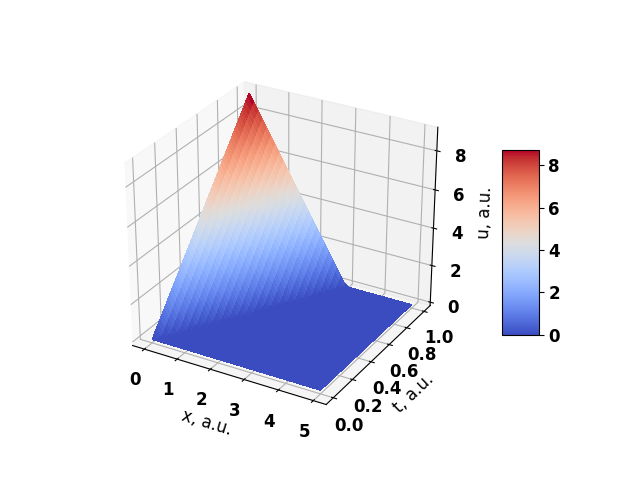

In [15]:
%matplotlib notebook
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x, a.u.')
ax.set_ylabel('t, a.u.')
ax.set_zlabel('u, a.u.')
surf = ax.plot_surface(xx, tt, u, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Получим аналитическое решение и визуализируем его.

In [17]:
x_true = np.zeros((N_x))
t_true = np.zeros((N_t))
u_true = np.zeros((N_t, N_x))
for i in range(N_x):
    x_true[i] = i * h
for i in range(N_t):
    t_true[i] = i * tau

In [18]:
for i in range(N_t):
    for j in range(N_x):
        if x[j] < K**(1/2)*t[i]:
            u_true[i][j] = K * t[i] - K**(1/2)*x[j]
        else:
            u_true[i][j] = 0

In [19]:
xx_true, tt_true = np.meshgrid(x_true, t_true)

<IPython.core.display.Javascript object>


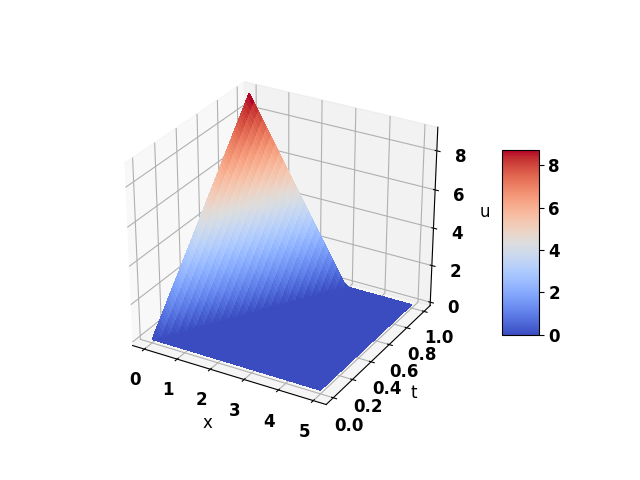

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
surf = ax.plot_surface(xx, tt, u_true, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Видим, что качественно картины совпадают. Посмотрим на разность аналитических и численных решений 

<IPython.core.display.Javascript object>


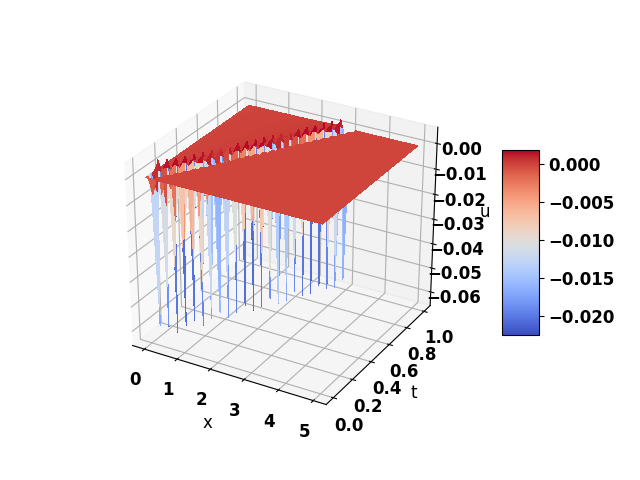

In [22]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
surf = ax.plot_surface(xx, tt, u_true-u, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Опишем полученную картину. Видим, что сходимость довольно хорошая за исключением некоторых пиков. Эти пики возникают засчет того, что наше аналитическое решение не является гладким при u = 0. Разностная же схема не может так резко "обрубить" значение уровня воды,
поэтому возникают рассхождения. Можно заметить, что геометрическое расположение пиков на графике совпадает с местом разрыва аналитеческого решения. Тем не менее, даже при с учетом этих пиков можно говорить о сходимости численного и аналитического решений.

Узнаем, произойдет ли наводнение или нет.

In [24]:
L, H = float(input()), float(input()) #ввести высоту и расстояние для деревни

1.33
0.4


In [25]:
array_L = np.array([L] * len(t))
array_H = np.array([H] * len(t))

 Пусть параметры деревни L и H. Тогда для того, чтобы узнать, произойдет ли затопление за весь период разливов нужно отложить прямую 
в трехмерном пр-ве. Смысл этой прямой таков - за все время разливов высота деревни H и расстояние от озера L. Если эта прямая пересечет наше численное решение, то точка пересечения соответствует тому времени, в который высота потока равна H на расстоянии L - происходит затопление. Для того, чтобы увидеть прямую, вероятно потребуется покрутить график.

<IPython.core.display.Javascript object>


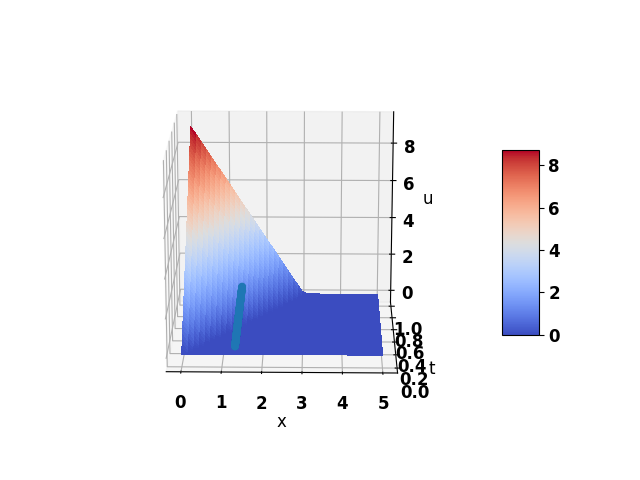

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
surf = ax.plot_surface(xx, tt, u, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.scatter(array_L, t, array_H)
plt.show()

Теперь мы можем понимать, произойдет ли наводнение или нет. Узнаем время его происхождения.

In [595]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx
idx1 = find_nearest(x, L)

In [596]:
sample_array = []
for i in range(N_t):
    sample_array.append(u[i][idx1])
idx2 = find_nearest(sample_array, H)
if idx2 == 0 or idx2 == len(t)-1:
    print('Затопления не будет')
else:
    time_pred = t[idx2] #время затопление согласно численному решению
    print('Предсказанное время затопления -', time_pred)

Предсказанное время затопления - 0.4729458917835671


In [597]:
time_est = (H + K**(1/2)*L)/K #рассчитанное аналитически значение времени затопления
if time_est > t[-1]:
    print('Затопления не будет') # t > T
else:
    print('Рассчитанное время затопления -', time_est)

Рассчитанное время затопления - 0.48777777777777787


Следовательно наше численное решение может предсказать время затопления.

Таким образом нами было полученно численное решение уравнения теплопроводности, совпадающее с аналитическим, для модели наводения (уравнение Бусинеска). Помимо этого была продемонстрирована возможность выяснить, произойдет ли наводнение или нет, а также определить время наводнения.

Источники:

1) Тихонов Н.А., Токмачев М.Г., Курс лекций "Основы математического моделирования", ч.1, стр. 73 http://math.phys.msu.ru/data/27/OMM_Part_1.pdf 

2) Suelen Gasparin et al., Stable explicit schemes for
simulation of nonlinear moisture
transfer in porous materials, стр. 18 https://arxiv.org/pdf/1701.07059.pdf